In [74]:
import gunpowder as gp
import zarr
import matplotlib.pyplot as plt

# declare arrays to use in the pipeline
raw = gp.ArrayKey('raw')
gt = gp.ArrayKey('ground_truth')

In [75]:
TEST_IMAGE = "../img/img.zarr"

In [76]:
img = zarr.open(TEST_IMAGE)

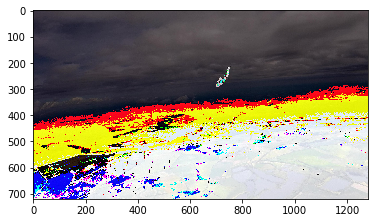

In [78]:
imgplot = plt.imshow(img['ground_truth'][:])

In [153]:
source = gp.ZarrSource(
    TEST_IMAGE,  # the zarr container
    {raw: 'raw', gt : 'ground_truth'},  # which dataset to associate to the array key
    {raw: gp.ArraySpec(interpolatable=True),
     gt: gp.ArraySpec(interpolatable=True)}  # meta-information
)
stack = gp.Stack(5)
simple_augment = gp.SimpleAugment()

#error
noise_augment = gp.NoiseAugment(raw)
normalize = gp.Normalize(raw)
import math
intensity_augment = gp.IntensityAugment(
  raw,
  scale_min=0.8,
  scale_max=1.2,
  shift_min=-0.2,
  shift_max=0.2)
noise_augment = gp.NoiseAugment(raw)
elastic_augment = gp.ElasticAugment(
  control_point_spacing=(16, 16),
  jitter_sigma=(4.0, 4.0),
  rotation_interval=(0, math.pi/2))

In [158]:
pipeline = source + random_location + stack 

In [159]:
request = gp.BatchRequest()

In [160]:
request[raw] = gp.Roi((0, 0,0), (64, 64,3))
request[gt] = gp.Roi((0, 0,0), (64, 64,3))

In [161]:
with gp.build(pipeline):
    batch = pipeline.request_batch(request)

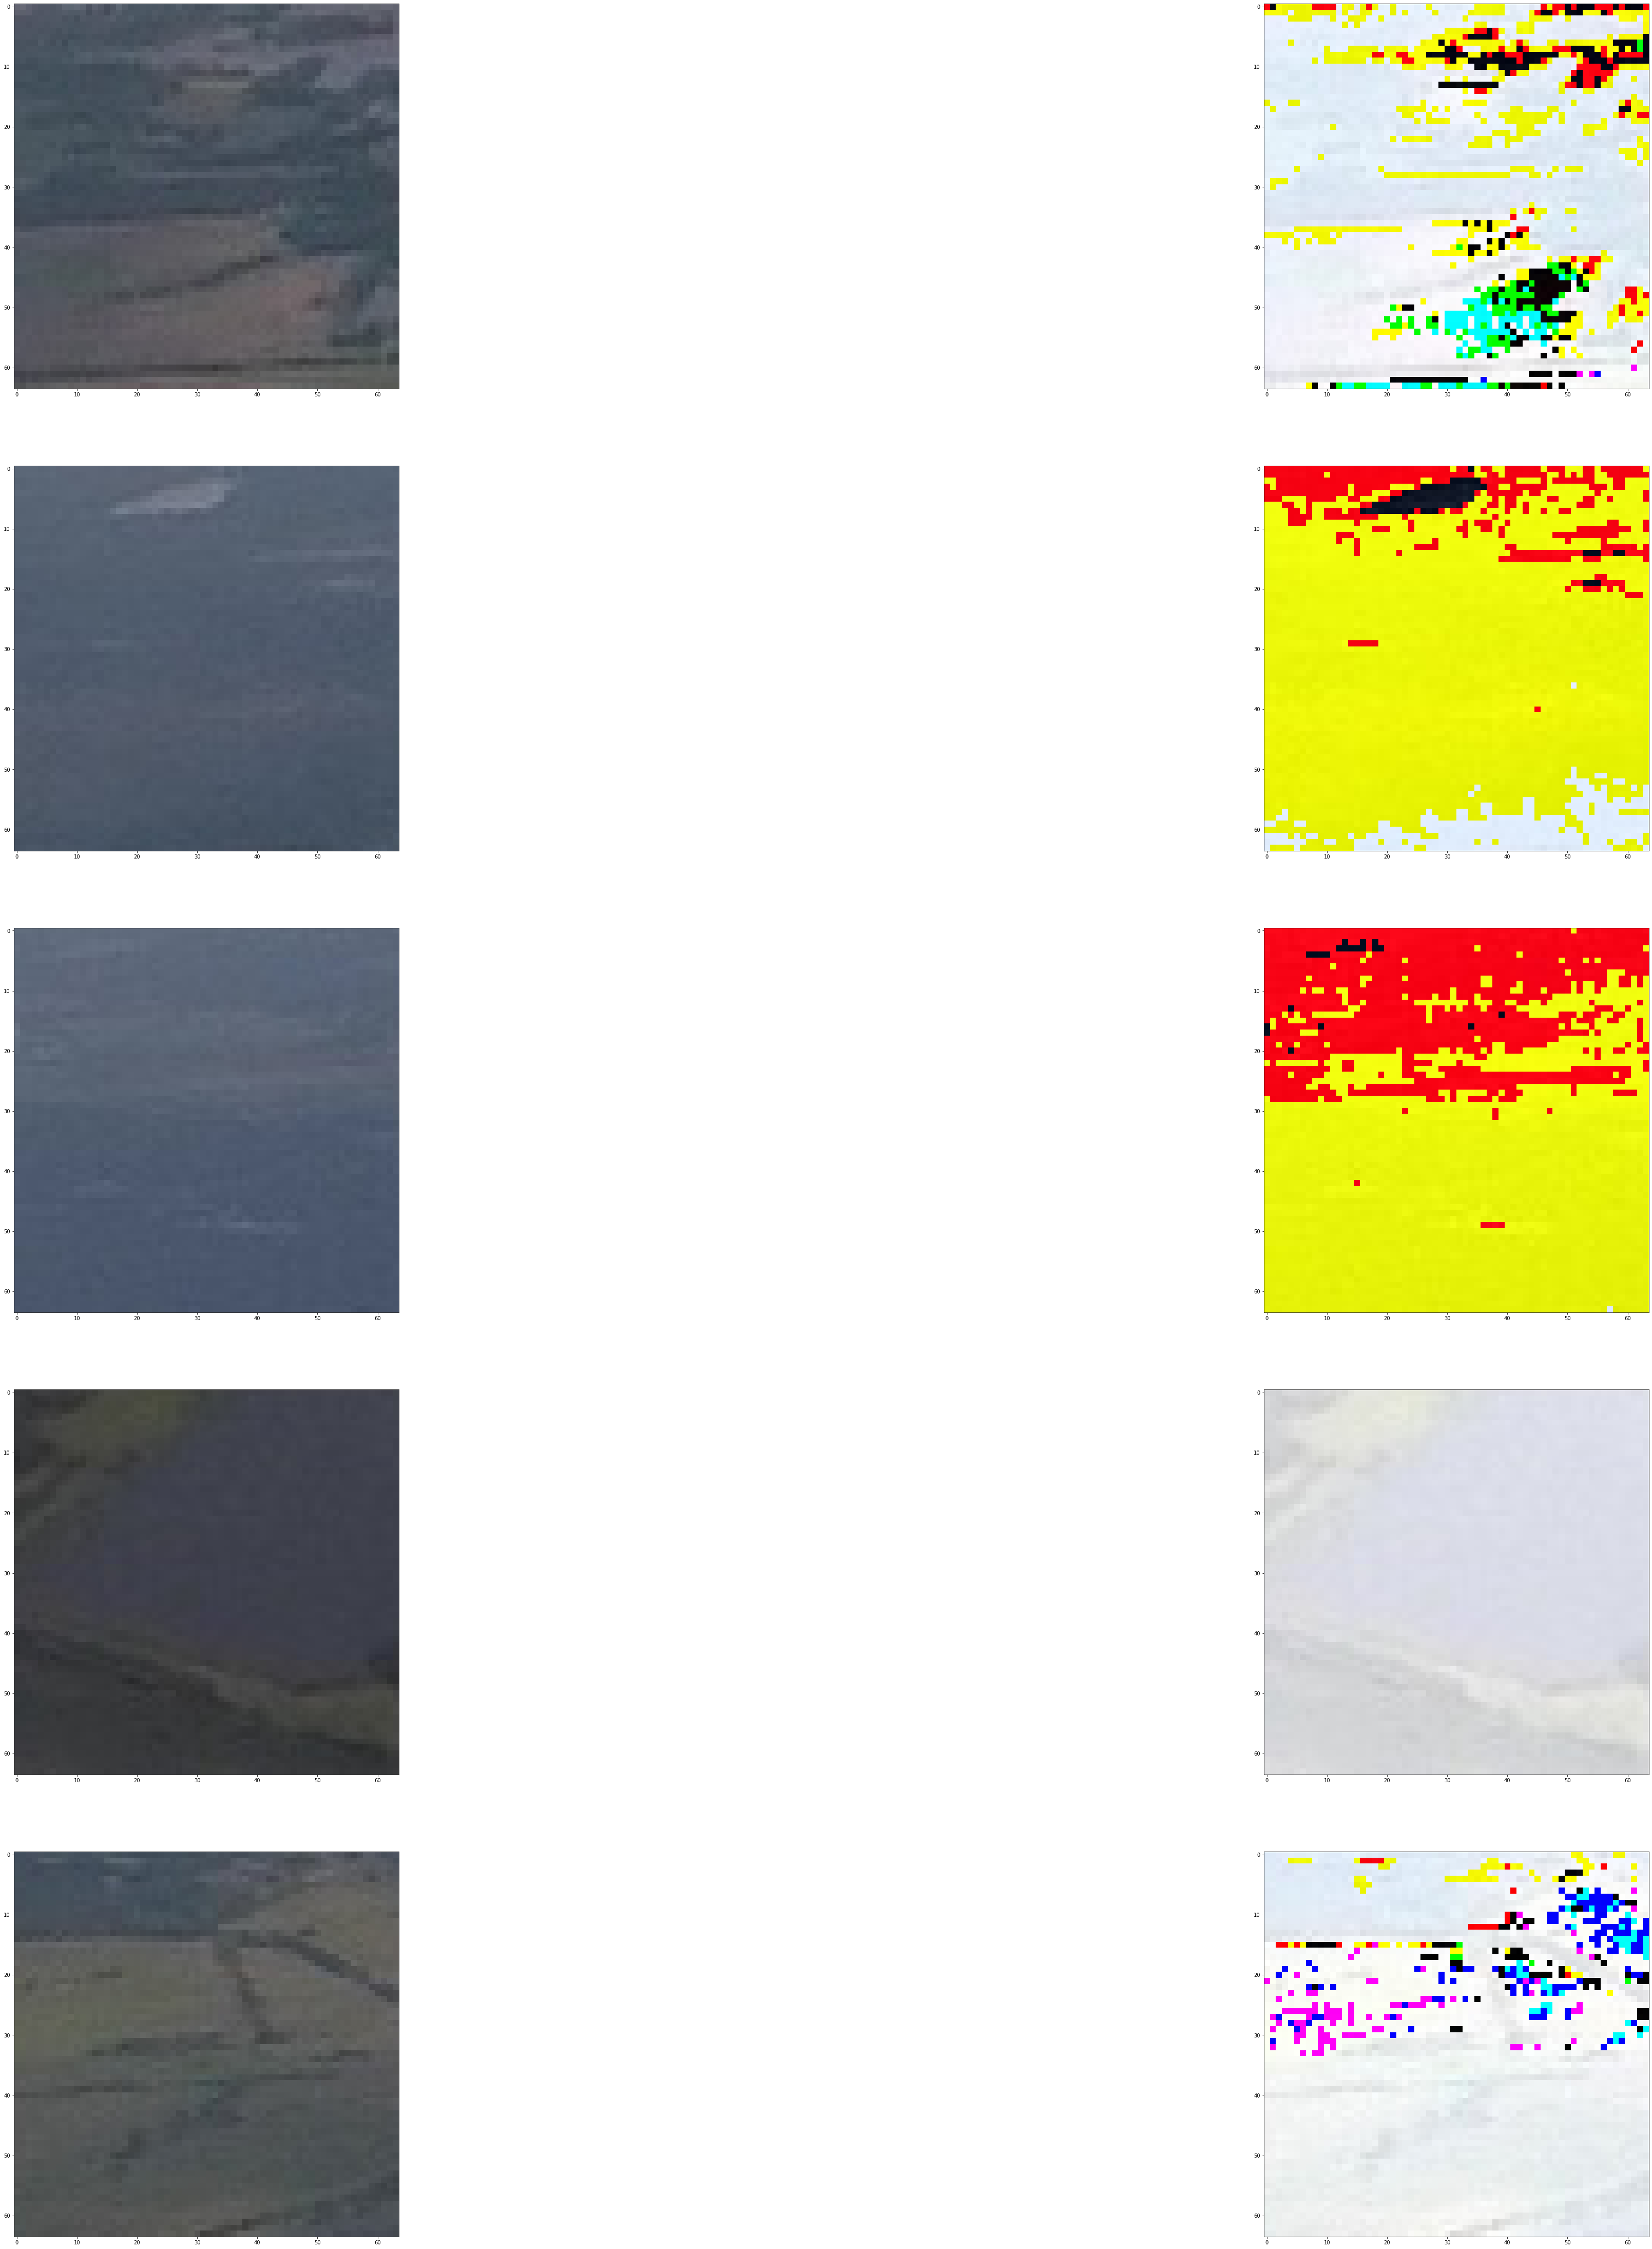

In [162]:
fig=plt.figure(figsize=(80, 80))
columns = 2
rows = batch[gt].data.shape[0]
for i in range(rows):
    fig.add_subplot(rows, columns, i*2+1)
    plt.imshow(batch[raw].data[i])
    fig.add_subplot(rows, columns, i*2+2)
    plt.imshow(batch[gt].data[i])
plt.show()
# plt.imshow()